In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv


In [2]:
pt1 = np.array([[37, 51], [342, 42], [485, 467], [73, 380]], dtype='float32')
pt2 = np.array([[0, 0], [511, 0], [511, 511], [0, 511]], dtype='float32')


In [3]:
img = cv.imread('./images/baboon.png', cv.IMREAD_GRAYSCALE)

In [4]:
def warp_perspective(img, M, dsize):
    dst = np.zeros(dsize)

    iY, iX = np.indices(dimensions=img.shape)
    indexInput = np.stack(
        (iX.ravel(), iY.ravel(), np.ones(iY.size))).astype(int)

    indexOutput = M.dot(indexInput)
    indexOutput = np.round(indexOutput / indexOutput[2, :]).astype(int)

    indexOutput = indexOutput.transpose()
    index = np.where((indexOutput[:, 0] < 0) | (indexOutput[:, 0] >= dsize[0]) | (
        indexOutput[:, 1] < 0) | (indexOutput[:, 1] >= dsize[1]))

    indexOutput[index] = 0
    dst[indexOutput[:, 1], indexOutput[:, 0]] = img.ravel()

    return dst


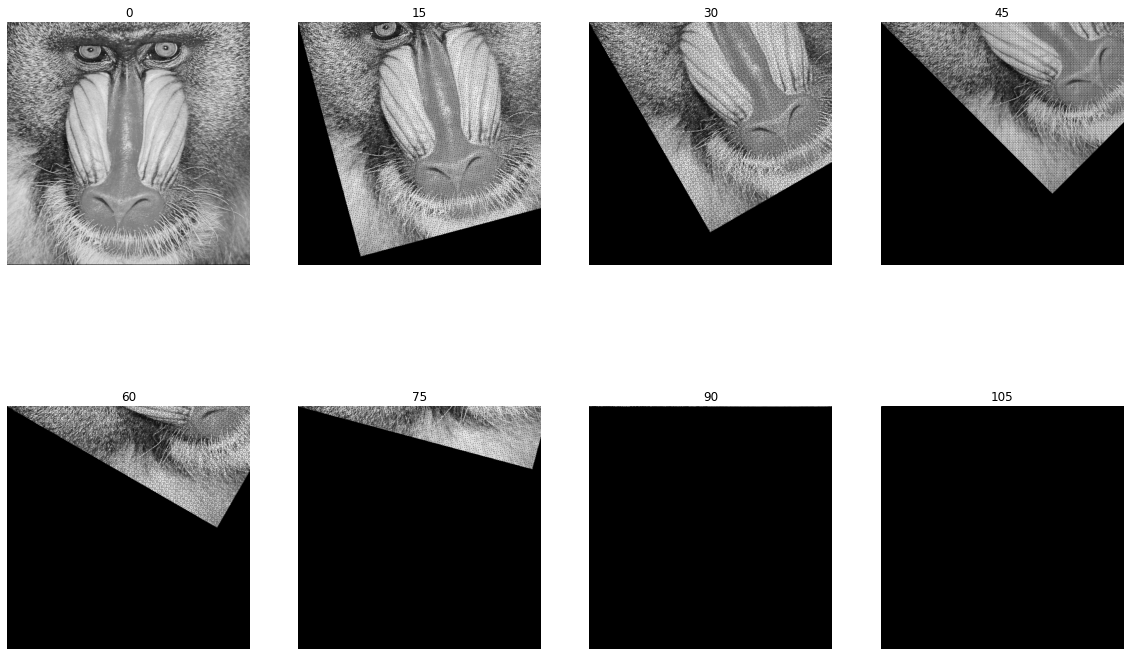

In [33]:
plt.figure(figsize=(20, 20))

angles = 8
alpha = 12
tethas = np.zeros(angles)
for i in range(angles):
    tethas[i] = -i * np.pi / alpha

cols = 4
rows = (angles // cols) + 1

for row in range(rows):
    for col in range(cols):
        index = (row*cols) + col
        if(index < angles):
            tetha = tethas[index]
            M = np.array([
                [np.cos(tetha), -np.sin(tetha), 0],
                [np.sin(tetha), np.cos(tetha), 0],
                [0, 0, 1]
            ], dtype='float32')
            #out = cv.warpPerspective(img, M, (512, 512))
            out = warp_perspective(img, M, (512, 512))

            plt.subplot(rows, cols, index + 1)
            plt.axis('off')
            plt.title('{}'.format(index * int(180 / alpha)))
            plt.imshow(out, cmap='gray')

    #plt.subplots_adjust(wspace=0.1, hspace=0.1)
